<a href="https://colab.research.google.com/github/saurabhsingh1411/Deep_Learning_Projects/blob/main/NLP/Detecting_sarcasm_in_news_headlines_with_LSTM_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import tensorflow as tf 

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-03-20 17:03:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 172.217.3.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2021-03-20 17:03:06 (38.3 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [8]:
with open('/tmp/sarcasm.json','r') as f:
  datastore=json.load(f)


In [10]:
type(datastore)

list

In [11]:
datastore

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [17]:
sentence=[]
labels=[]
urls=[]

for item in datastore :
  sentence.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [18]:
sentence

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages",
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 "north korea praises trump and urges us voters to reject 'dull hillary'",
 "actually, cnn's jeffrey lord has been 'indefensible' for a while",
 'barcelona holds huge protest in su

In [16]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [21]:
X_train=sentence[0:training_size]
X_test=sentence[training_size:]
y_train=labels[0:training_size]
y_test=labels[training_size:]

In [37]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index=tokenizer.word_index

training_sequence=tokenizer.texts_to_sequences(X_train)
training_padded=pad_sequences(training_sequence,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [33]:
training_padded.shape

(20000, 120)

In [36]:
training_sequence

[[328, 1, 799, 1, 1, 47, 389, 1, 1, 6, 1, 1],
 [4, 1, 1, 1, 23, 2, 161, 1, 390, 1, 6, 251, 9, 889],
 [153, 890, 2, 891, 1, 1, 595, 1, 221, 133, 36, 45, 2, 1],
 [1, 38, 213, 382, 2, 1, 29, 288, 23, 10, 1, 1, 1, 958],
 [715, 672, 1, 1, 1, 662, 553, 5, 4, 92, 1, 90],
 [1, 4, 366, 70],
 [4, 1, 369, 6, 498, 1, 1, 1],
 [20, 563, 36, 1, 31, 163, 2, 103, 87, 18, 150, 6, 33, 343],
 [278, 1, 1, 447, 1, 1, 148],
 [1, 300, 335, 370, 63, 1, 6, 4, 1],
 [1, 1, 1, 14, 37, 1, 1, 5, 1, 1],
 [309, 767, 428, 8, 1, 1, 9, 1],
 [226, 477, 1, 13, 9, 922, 239, 371, 2, 1, 1, 1],
 [235, 1, 1, 1, 39, 240, 1, 6, 7, 174],
 [1, 1, 800, 663, 5, 336, 3, 959],
 [524, 1, 1, 126, 1, 6, 1, 1, 1],
 [1, 1, 341, 46, 1, 323, 288, 960, 2, 22, 1, 19, 1, 359, 109, 1],
 [1, 1, 1, 1, 19, 1, 1],
 [1, 822, 2, 1, 251, 1, 38, 211, 1],
 [1, 1, 1],
 [1, 1, 801, 39, 1, 1, 1],
 [13, 1, 141, 25, 823, 6, 607, 1, 1, 21, 1, 1, 34, 33, 1, 1],
 [1, 1, 1, 56, 37, 1, 133, 73, 1, 9, 1],
 [20, 11, 46, 18, 1, 179, 2, 4, 1],
 [608, 478, 824, 4, 1, 1,

In [35]:
X_test

['pediatricians announce 2011 newborns are ugliest babies in 30 years',
 "don't rely on your fitness tracker to lose weight",
 'you might want to cut back on the soap',
 'bausch & lomb introduces line of aviator contacts',
 '7 everyday habits for glowing, younger-looking skin',
 'report: sky normal today',
 'bernie sanders to propose new rule requiring fair prices for taxpayer-funded drugs',
 'friend who listened to podcast on watergate bursts into conversation with guns fucking blazing',
 'economists warn new graduates may have to tough it out for 5 to 6 weeks before landing dream job',
 'how the uk is strengthening interfaith bonds after paris attacks',
 'historical archives: dances you may wish to try',
 'god seeking to crack down on souls smuggling drugs into heaven',
 "this 'brilliant' new technology could spell the demise of the flu shot",
 'confronting isil: the day and decade "after"',
 'mark zuckerberg continues to insist facebook could not possibly have influenced election',


In [34]:
word_index

{'<OOV>': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'trump': 13,
 'man': 14,
 'from': 15,
 'at': 16,
 'about': 17,
 'you': 18,
 'by': 19,
 'this': 20,
 'after': 21,
 'be': 22,
 'up': 23,
 'out': 24,
 'that': 25,
 'how': 26,
 'as': 27,
 'it': 28,
 'not': 29,
 'are': 30,
 'your': 31,
 'what': 32,
 'his': 33,
 'all': 34,
 'he': 35,
 'will': 36,
 'who': 37,
 'just': 38,
 'has': 39,
 'more': 40,
 'one': 41,
 'year': 42,
 'into': 43,
 'report': 44,
 'have': 45,
 'why': 46,
 'over': 47,
 'area': 48,
 'u': 49,
 'donald': 50,
 'says': 51,
 'day': 52,
 'can': 53,
 's': 54,
 'first': 55,
 'woman': 56,
 'time': 57,
 'like': 58,
 'get': 59,
 'old': 60,
 'no': 61,
 'her': 62,
 "trump's": 63,
 'off': 64,
 'now': 65,
 'an': 66,
 'obama': 67,
 'life': 68,
 'people': 69,
 'women': 70,
 'house': 71,
 "'": 72,
 'was': 73,
 'still': 74,
 'white': 75,
 'back': 76,
 'make': 77,
 'than': 78,
 'clinton': 79,
 'down': 80,
 'when': 8

In [25]:
testing_sequence=tokenizer.texts_to_sequences(X_test)
testing_padded=pad_sequences(testing_sequence,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [28]:
from tensorflow.keras import layers
model=tf.keras.Sequential()

model.add(layers.Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(24,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
import numpy as np
num_epochs=5
history=model.fit(training_padded,np.array(y_train),epochs=num_epochs,validation_data=(testing_padded,np.array(y_test)),verbose=1)

Epoch 1/5
625/625 [==============================] - 35s 52ms/step - loss: 0.6904 - accuracy: 0.6673 - val_loss: 0.3932 - val_accuracy: 0.8185
Epoch 2/5
625/625 [==============================] - 32s 51ms/step - loss: 0.3630 - accuracy: 0.8353 - val_loss: 0.3878 - val_accuracy: 0.8219
Epoch 3/5
625/625 [==============================] - 32s 51ms/step - loss: 0.3457 - accuracy: 0.8429 - val_loss: 0.3813 - val_accuracy: 0.8258
Epoch 4/5
625/625 [==============================] - 31s 50ms/step - loss: 0.3281 - accuracy: 0.8537 - val_loss: 0.3730 - val_accuracy: 0.8296
Epoch 5/5
625/625 [==============================] - 31s 50ms/step - loss: 0.3226 - accuracy: 0.8585 - val_loss: 0.3717 - val_accuracy: 0.8334


In [43]:
print(type(training_padded))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'list'>


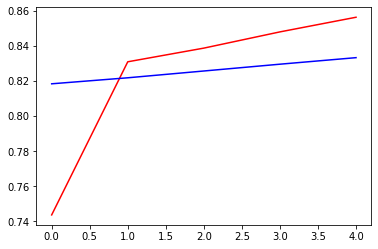

In [50]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='training acc')
plt.plot(epochs,val_acc,'b',label='val acc')
#plt.legend(acc, val_acc)

plt.show()

Now try replacing bidirectional LSTM layer with conv1d

In [51]:
from tensorflow.keras import layers
model=tf.keras.Sequential()

model.add(layers.Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(24,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 30
history = model.fit(training_padded, np.array(y_train), epochs=num_epochs, validation_data=(testing_padded, np.array(y_test)), verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
625/625 [==============================] - 7s 11ms/step - loss: 0.3614 - accuracy: 0.8364 - val_loss: 0.3

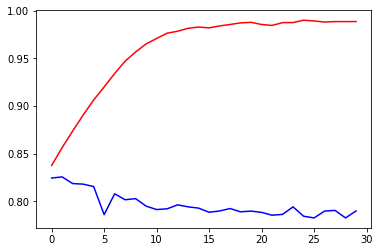

In [56]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='training acc')
plt.plot(epochs,val_acc,'b',label='val acc')
#plt.legend(acc, val_acc)

plt.show()